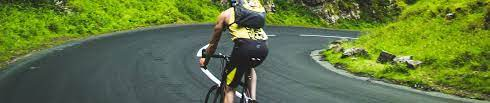

In [10]:
from IPython.display import Image
Image(filename='test.png') 

# Project Summary.
Trip duration is the most fundamental measure in all modes of transportation. Hence, it is crucial to predict the trip-time precisely for the advancement of Intelligent Transport Systems (ITS) and traveller information systems. In order to predict the trip duration, data mining techniques are employed in this project to predict the trip duration of rental bikes in Seoul Bike sharing system. The prediction is carried out with the combination of Seoul Bike data and weather data.

# Please use the Seoul Bike dataset.
What are the factors that influence the number of bikes rented?
Explore the data for outliers and missing values.
Plot the correlation between the variables and state your comments
Please build a linear regression model to predict rented bike count by choosing appropriate independentvariables.
Coment on Model performance by using approapriate diagnostics and measures.

In [11]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

# Loding The dataset

In [12]:
df = pd.read_csv("SeoulBikeData.csv")
df.head(10)


,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [13]:
# statestical info
df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [17]:
# additional info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [19]:
# unique value
df.apply(lambda x: len(x.unique()))

Date                         365
Rented Bike Count           2166
Hour                          24
Temperature(C)               546
Humidity(%)                   90
Wind speed (m/s)              65
Visibility (10m)            1789
Dew point temperature(C)     556
Solar Radiation (MJ/m2)      345
Rainfall(mm)                  61
Snowfall (cm)                 51
Seasons                        4
Holiday                        2
Functioning Day                2
dtype: int64

In [20]:
# check for null values
df.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [21]:
df["Date"] = pd.to_datetime(df["Date"])
df["Date"]

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [22]:
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day
df

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30


In [23]:
df_catagoric_features = df.select_dtypes(include=object)
df_catagoric_features.columns

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [24]:

dummy_encoded_variables = pd.get_dummies(df_catagoric_features, drop_first=True)
df_numeric_features = df.select_dtypes(include=np.number)

In [28]:
df = pd.concat([df_numeric_features,dummy_encoded_variables], axis=1)
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year,month,day,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,1,12,0,0,1,1,1


# Explore the data analysis 

[Text(0.5, 1.0, 'What are the factors that influence the number of bikes rented ')]

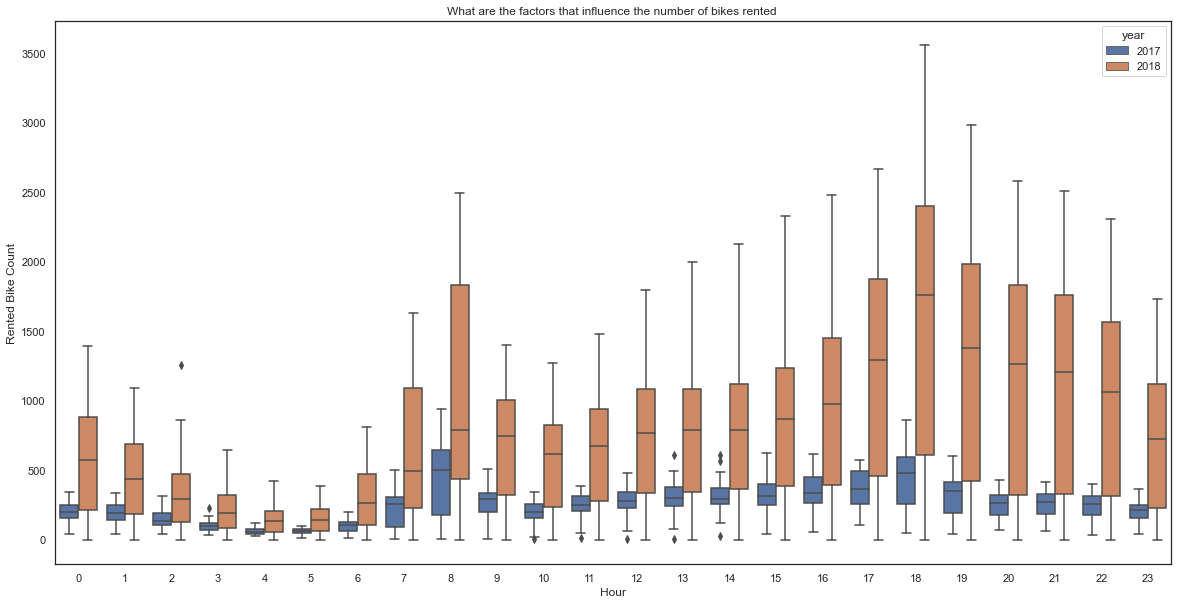

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df, x='Hour', y='Rented Bike Count', hue='year', ax=ax)
ax.set(title='What are the factors that influence the number of bikes rented ')

# Corelation Matrix

<AxesSubplot:>

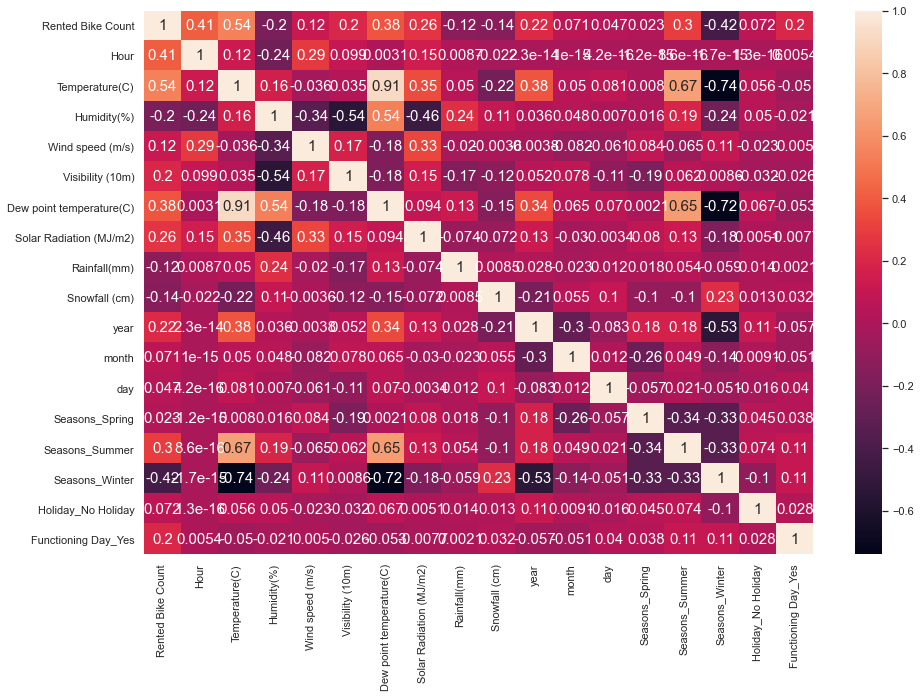

In [49]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

[Text(0.5, 1.0, 'Relation between humidity and bike rental')]

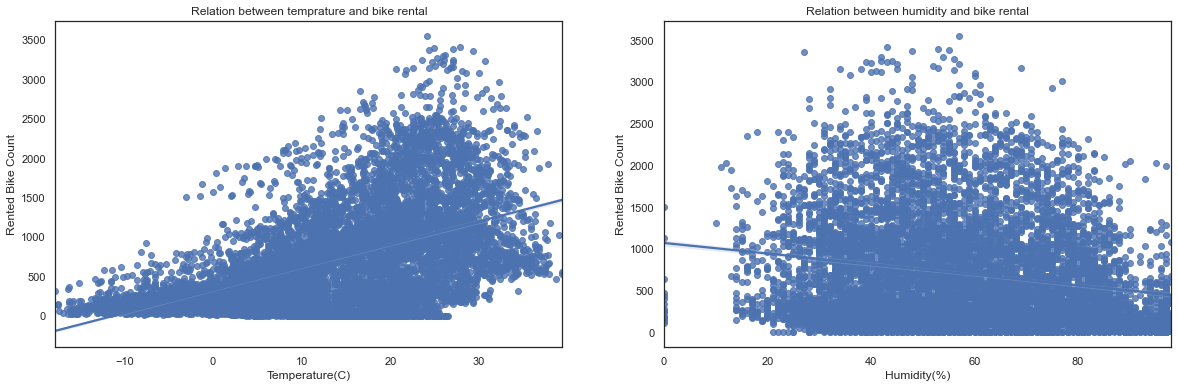

In [50]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=df['Temperature(C)'], y=df['Rented Bike Count'], ax=ax1)
ax1.set(title="Relation between temprature and bike rental")
sns.regplot(x=df['Humidity(%)'], y=df['Rented Bike Count'], ax=ax2)
ax2.set(title="Relation between humidity and bike rental")

[Text(0.5, 1.0, 'theortical quantiles')]

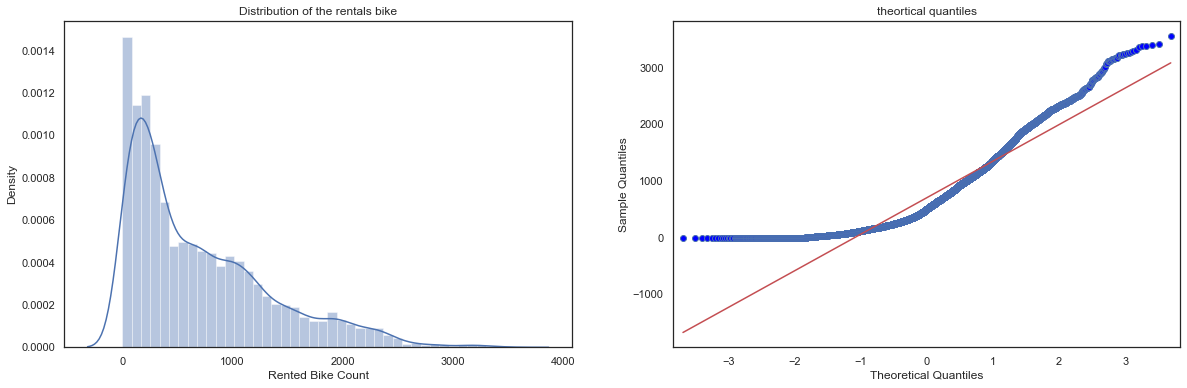

In [51]:
from statsmodels.graphics.gofplots import  qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['Rented Bike Count'], ax=ax1)
ax1.set(title='Distribution of the rentals bike')
qqplot(df['Rented Bike Count'], ax=ax2, line='s')
ax2.set(title='theortical quantiles')

[Text(0.5, 1.0, 'theortical quantiles')]

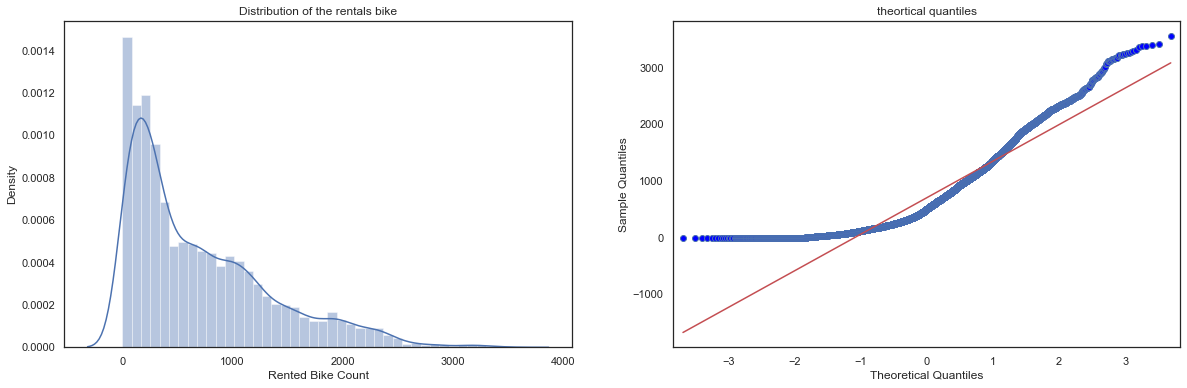

In [52]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['Rented Bike Count'], ax=ax1)
ax1.set(title='Distribution of the rentals bike')
qqplot(df['Rented Bike Count'], ax=ax2, line='s')
ax2.set(title='theortical quantiles')

# Iput Split

# Input

In [53]:
target_corr = abs(corr['Rented Bike Count'])
positive_corr_target = target_corr[target_corr> (0.2)]
positive_corr_target

Rented Bike Count           1.000000
Hour                        0.410257
Temperature(C)              0.538558
Dew point temperature(C)    0.379788
Solar Radiation (MJ/m2)     0.261837
year                        0.215162
Seasons_Summer              0.296549
Seasons_Winter              0.424925
Functioning Day_Yes         0.203943
Name: Rented Bike Count, dtype: float64

In [69]:
df.shape

(8760, 18)

In [70]:
X = df.drop(['Rented Bike Count'],axis=1).values   
y = df['Rented Bike Count'].values

In [107]:
train, val = train_test_split(df, test_size=0.30, random_state=42)

In [108]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
train_x = train.drop(['Rented Bike Count'], axis = 1)
train_y = train['Rented Bike Count']             # output of the training data

val_x = val.drop(['Rented Bike Count'], axis = 1)
val_y = val['Rented Bike Count']

In [110]:
print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of val_x dataframe:',val_x.shape)
print('Dimension of val_y dataframe:',val_y.shape)

Dimension of train_x dataframe: (6132, 17)
Dimension of train_y dataframe: (6132,)
Dimension of val_x dataframe: (2628, 17)
Dimension of val_y dataframe: (2628,)


In [117]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [118]:
from sklearn.linear_model import LinearRegression
ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y)

LinearRegression()

In [121]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
df_pred = ln_reg.predict(val_x)
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, val_y))
print('R_Squared Score of linear regression:', r2_score(df_pred, val_y))
print('Accuracy:',ln_reg.score(val_x,val_y))

Mean Square Error of linear regression: 190197.24101391697
R_Squared Score of linear regression: 0.20178189452235307
Accuracy: 0.5358666837184745
